# K-means Clustering

Given $N$ data points $\{\mathbf{x}_n\}$, we want to assign the data points into $k$ clusters. For each datapoint $\mathbf{x}_n$, define a binary vector $\mathbf{r}_n$, where $r_{nk}\in{0, 1} with k=1,\dots, K$, indicating the cluster that the data point belongs to. If data point $\mathbf{x}_n$ is assigned to cluster $k$ then $r_{nk} = 1$, and $r_{nj} = 0$ for $j \neq k$. Also denote ${\mathbf{\mu}_k}$ as the $K$ centroids.

Define an objective function:
$$J=\sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||\mathbf{x}_n - \mathbf{\mu}_k||^2$$

- Consider the centroids are fixed, assign each data point to the nearest centroid:
$$r_{nk}=\begin{cases}
    1\hspace{1cm}\text{if $k=argmin_{j}||\mathbf{x}_n - \mathbf{\mu}_j||^2$}\\
    0\hspace{1cm}\text{otherwise}
\end{cases}$$
- Consider the centroid assignments are fixed, set $\frac{\partial{J}}{\partial{\mathbf{\mu}_k}} = 0$:
$$\sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}\left(\mathbf{x}_n - \mathbf{\mu}_k\right)=0$$
$$\Rightarrow\mathbf{\mu}_k=\frac{\sum_{n}r_{nk}\mathbf{x}_n}{\sum_{n}r_{nk}}$$

In [37]:
import numpy as np

class KMeans:
    """
    KMeans Clustering
    
    Parameters:
    -----------
    n_centroids: int, number of centroids
    max_iter: int, maximum number of iterations if convergence was not reached
    conv_thresh: float, maximum proportion of change in the objective function
        to not stop the algorithm
    """
    def __init__(self, n_centroids, max_iter=100, conv_thresh=1e-3):
        self.n_centroids = n_centroids
        self.max_iter = max_iter
        self.conv_thresh = conv_thresh
        
    def _init_centroids(self, X):
        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_centroids, n_features))
        for k in range(self.n_centroids):
            centroids[k, :] = X[np.random.choice(range(n_samples))]
        return centroids
    
    def _euclidean_dist(self, x, y):
        return np.sqrt(np.sum((x-y)**2))
    
    def _assign_clusters(self, X, centroids):
        n_samples, n_features = X.shape
        assignments = np.empty(n_samples)
        
        for n in range(n_samples):
            sample = X[n, :]
            dists = np.zeros((self.n_centroids))

            for k in range(self.n_centroids):
                dists[k] = self._euclidean_dist(sample, centroids[k, :])
            
            assignments[n] = np.argmin(dists)
        return assignments
    
    def _update_centroids(self, X, centroids, assignments):
        for k in range(self.n_centroids):
            new_centroid = np.mean(X[assignments == k, :], axis=0)
            if np.sum(np.isnan(new_centroid)) == 0:
                centroids[k, :] = new_centroid
        return centroids
    
    def _compute_objective(self, X, centroids, assignments):
        n_samples, n_features = X.shape
        objective = 0.0
        
        for n in range(n_samples):
            sample = X[n, :]
            dist = self._euclidean_dist(sample, centroids[int(assignments[n]), :])
            objective += (dist / n_samples)
        return objective

    def predict(self, X):
        objective = None
        centroids = self._init_centroids(X)
        old_assignment = np.zeros(X.shape[0])

        for i in range(self.max_iter):
            assignment = self._assign_clusters(X, centroids)
            centroids = self._update_centroids(X, centroids, assignment)
            
            new_objective = self._compute_objective(X, centroids, assignment)
            if objective is not None:
                objective_change = np.abs((new_objective - objective) / objective)
                if objective_change < self.conv_thresh:
                    break
            objective = new_objective
            old_assignment = assignment
            print("iter %d: obj func = %f" % (i, objective))
            
        return [centroids, assignment]

In [38]:
import cv2

kmeans = KMeans(5)

img = cv2.imread('../data/lena.png')
flattened_img = img.reshape((img.shape[0]*img.shape[1], 3))

[centroids, assignment] = kmeans.predict(flattened_img)

new_flattened_img = np.zeros(flattened_img.shape)
for i in range(flattened_img.shape[0]):
    new_flattened_img[i, :] = centroids[int(assignment[i])]


iter 0: obj func = 25.411166
iter 1: obj func = 24.660366
iter 2: obj func = 24.338732
iter 3: obj func = 24.070915
iter 4: obj func = 23.832208
iter 5: obj func = 23.616015
iter 6: obj func = 23.419071
iter 7: obj func = 23.240327
iter 8: obj func = 23.085429
iter 9: obj func = 22.968119
iter 10: obj func = 22.878517
iter 11: obj func = 22.797424
iter 12: obj func = 22.705052
iter 13: obj func = 22.591976
iter 14: obj func = 22.458150
iter 15: obj func = 22.325570
iter 16: obj func = 22.217927
iter 17: obj func = 22.145332
iter 18: obj func = 22.099173
iter 19: obj func = 22.076654


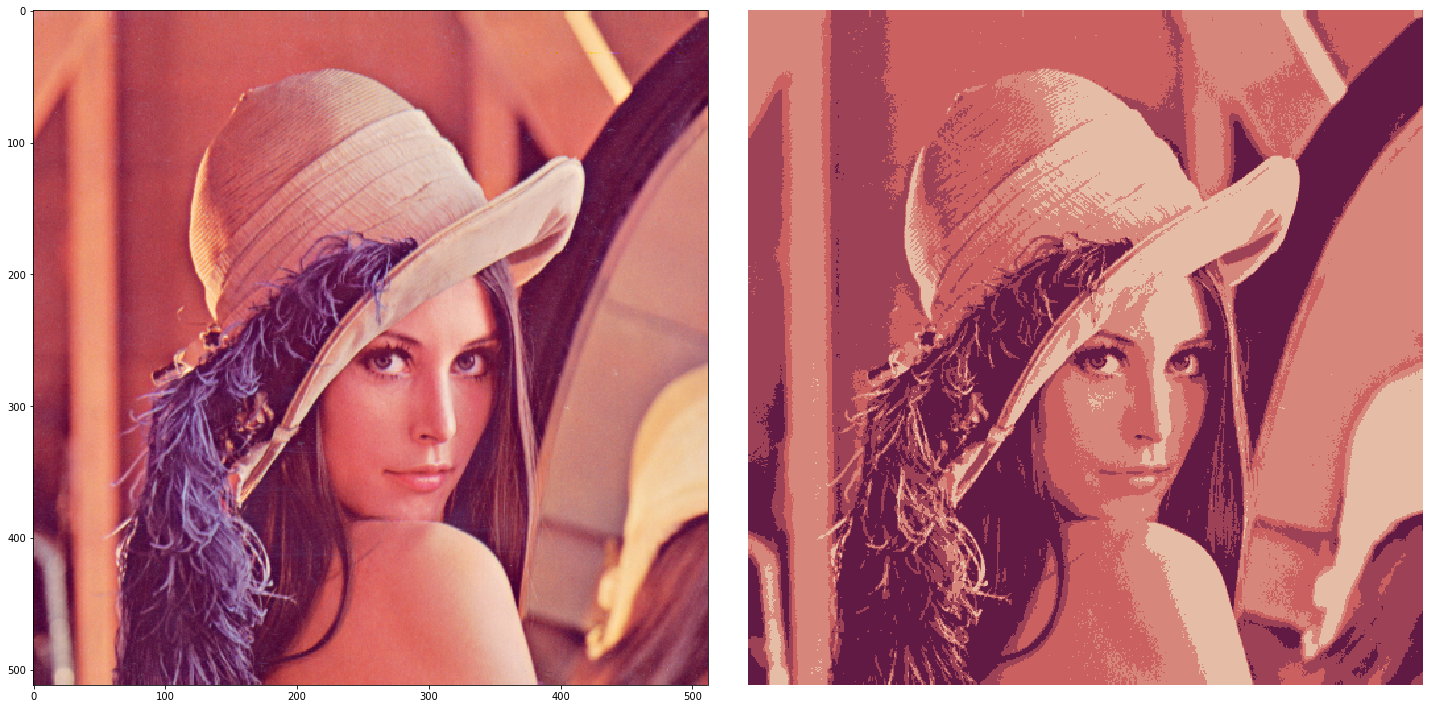

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

new_img = np.uint8(new_flattened_img.reshape(img.shape))
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[1].axis('off')
fig.tight_layout()